In [13]:
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import process_data

In [2]:
if __name__ == '__main__':
    print("Extracting the data")
    # print("\n")
    data = h5py.File("./running_data_set.h5", 'r')

Extracting the data


In [24]:
label_df = pd.Series([1,5,6,2,3,4],index=["Asphalt","Bark_Mulch","Grass","Gravel","Tartan","Trail"])
label_df

Asphalt       1
Bark_Mulch    5
Grass         6
Gravel        2
Tartan        3
Trail         4
dtype: int64

In [3]:
subjects = np.arange(1,21)

process_dataset = process_data.process_data()
df = process_dataset.process_subjects(data, subjects)

parsing data for  14
parsing data for  12
parsing data for  20
parsing data for  9
parsing data for  13
parsing data for  18
parsing data for  5
parsing data for  4
parsing data for  11
parsing data for  16
parsing data for  2
parsing data for  19
parsing data for  3
parsing data for  8
parsing data for  10
parsing data for  1
parsing data for  17
parsing data for  7
parsing data for  6
parsing data for  15


In [4]:
df.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,magX,magY,magZ,terrain,pain,exhaustion,foot,subject
1,0.285003,-1.160019,-10.735016,35.735924,9.947978,-10.011689,4838.100098,-9523.200195,-4761.600098,1.0,2.0,1.0,0.0,14.0
2,0.035196,-1.479499,-10.841085,37.694668,9.088736,-13.619488,4607.700195,-9600.000000,-4377.600098,1.0,2.0,1.0,0.0,14.0
3,0.128855,-1.375615,-10.639238,40.303116,7.611118,-19.546761,5298.899902,-9216.000000,-4608.000000,1.0,2.0,1.0,0.0,14.0
4,1.088033,-1.318571,-10.412766,41.488319,6.891014,-16.500757,5145.299805,-9369.599609,-4300.799805,1.0,2.0,1.0,0.0,14.0
5,0.620791,-1.379480,-10.050577,43.563992,5.985809,-15.533688,5145.299805,-9369.599609,-4608.000000,1.0,2.0,1.0,0.0,14.0


In [17]:
# plt.figure(figsize=(10,5))

def data_distribution(df):

    var_lst = []

    for i in range(len(df["subject"].unique())):

        test_data = df[df['subject']==i+1]

        lst = []

        for j in test_data['terrain'].unique():
            lst.append(test_data[test_data['terrain']==j].shape[0])


        var_lst.append(np.var(np.array(lst)/np.max(lst)))

        test_data_len = pd.Series(lst,index=["Asphalt","Bark_Mulch","Grass","Gravel","Tartan","Trail"])
        plt.subplot(5,4,i+1)
        test_data_len.plot("bar",ax=plt.gca(),figsize=(20,10),sharex=True,sharey=True)
        plt.title("Subject" + str(i+1))


        plt.ylabel("Datapoints")
        plt.xlabel("Terrain")
    plt.show()

    # plt.savefig("data_distribution.png")
    # files.download("data_distribution.png")
    return var_lst

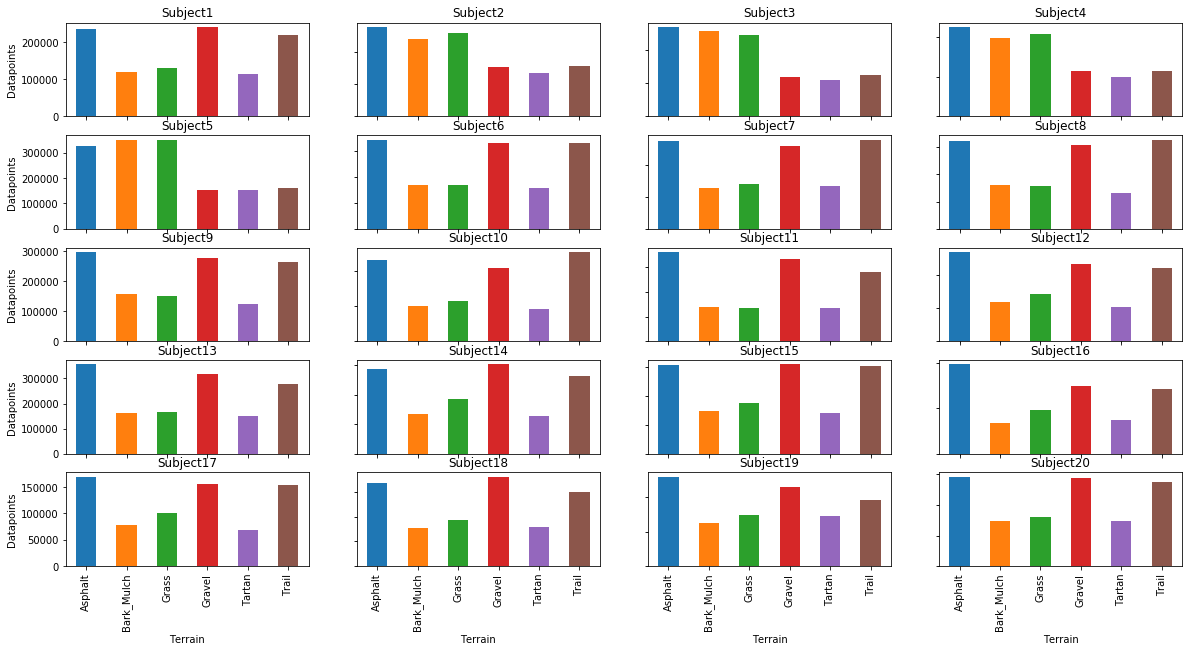

In [18]:
var_lst = data_distribution(df)

In [19]:
#Selecting the data with minimum variance subject 19

data = df[df["subject"] == np.argmin(var_lst)+1]

In [20]:
data[data['foot']==0].shape

(544214, 14)

In [21]:
data[data['foot']==1].shape

(550695, 14)

In [22]:
data = data.reset_index(drop=True)

In [25]:
label_df

Asphalt       1
Bark_Mulch    5
Grass         6
Gravel        2
Tartan        3
Trail         4
dtype: int64

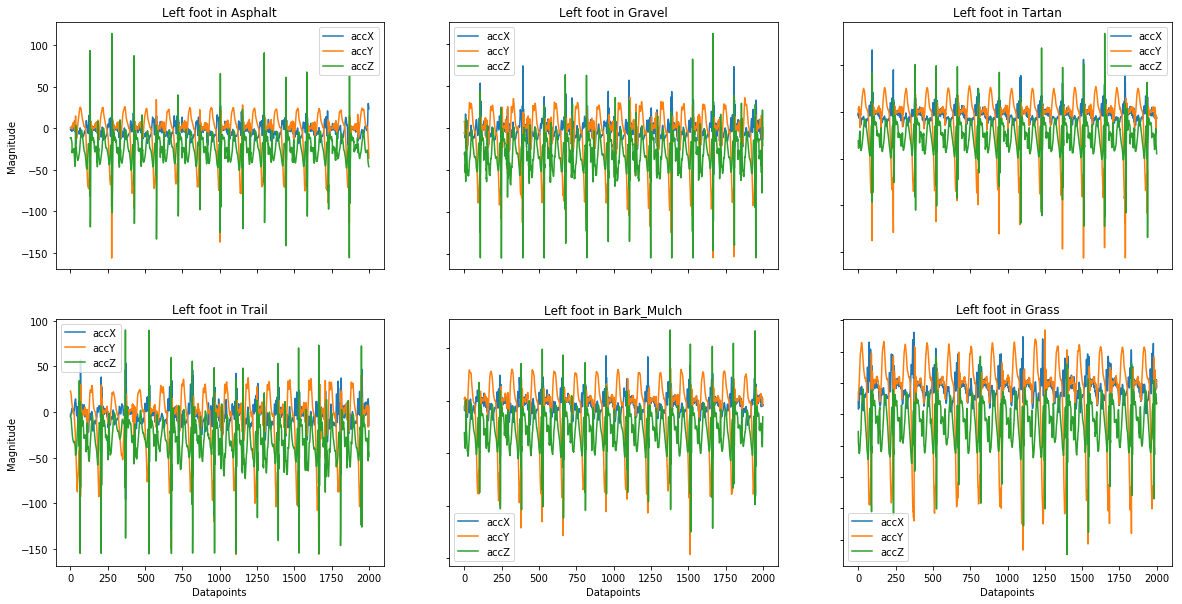

In [26]:
test_data = data[data['foot'] == 0 ]


for i in test_data["terrain"].unique():
  
    tmp_data = test_data[test_data['terrain']==i][10000:12000]

    tmp_data = tmp_data.reset_index(drop=True)

    lst = []

    #   test_data_len = pd.Series(lst,index=["Asphalt","Bark_Mulch","Grass","Gravel","Tartan","Trail"])
    plt.subplot(2,3,i)
    tmp_data.plot( y='accX',ax=plt.gca(),figsize=(20,10),sharex=True,sharey=True)
    tmp_data.plot( y='accY',ax=plt.gca(),figsize=(20,10),sharex=True,sharey=True)
    tmp_data.plot( y='accZ',ax=plt.gca(),figsize=(20,10),sharex=True,sharey=True)
    plt.title("Left foot in " + str(label_df[label_df == i].index[0]) )


    plt.xlabel("Datapoints")
    plt.ylabel("Magnitude")

    # plt.savefig("Left_foot_distribution.png")
    # files.download("Left_foot_distribution.png")

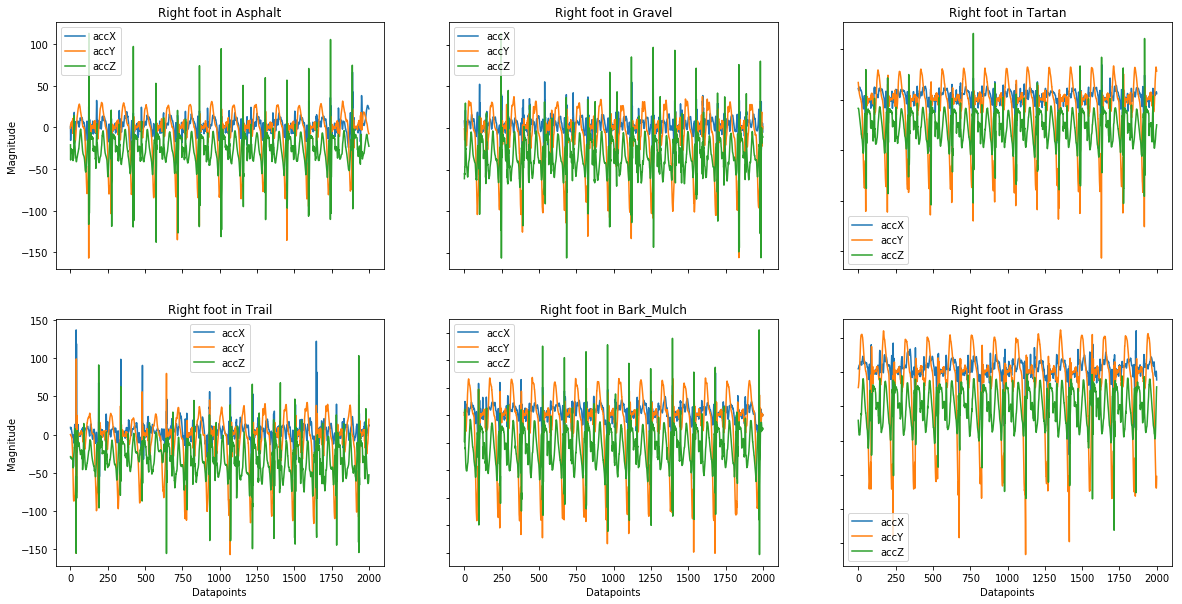

In [27]:
test_data = data[data['foot'] == 1]


for i in test_data["terrain"].unique():
  
    tmp_data = test_data[test_data['terrain']==i][10000:12000]

    tmp_data = tmp_data.reset_index(drop=True)

    lst = []

    #   test_data_len = pd.Series(lst,index=["Asphalt","Bark_Mulch","Grass","Gravel","Tartan","Trail"])
    plt.subplot(2,3,i)
    tmp_data.plot( y='accX',ax=plt.gca(),figsize=(20,10),sharex=True,sharey=True)
    tmp_data.plot( y='accY',ax=plt.gca(),figsize=(20,10),sharex=True,sharey=True)
    tmp_data.plot( y='accZ',ax=plt.gca(),figsize=(20,10),sharex=True,sharey=True)
    plt.title("Right foot in " + str(label_df[label_df == i].index[0]) )


    plt.xlabel("Datapoints")
    plt.ylabel("Magnitude")

    # plt.savefig("Right_foot_distribution.png")
    # files.download("Right_foot_distribution.png")